# Vamos a crear un proyecto para realizar consulta web para clasificar clientes end to end.


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn plotly

In [2]:
# Paso 1: Crear un entorno de desarrollo y cargar librerías necesarias

# Instalar las librerías necesarias si aún no están instaladas
# pip install numpy pandas matplotlib seaborn scikit-learn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px

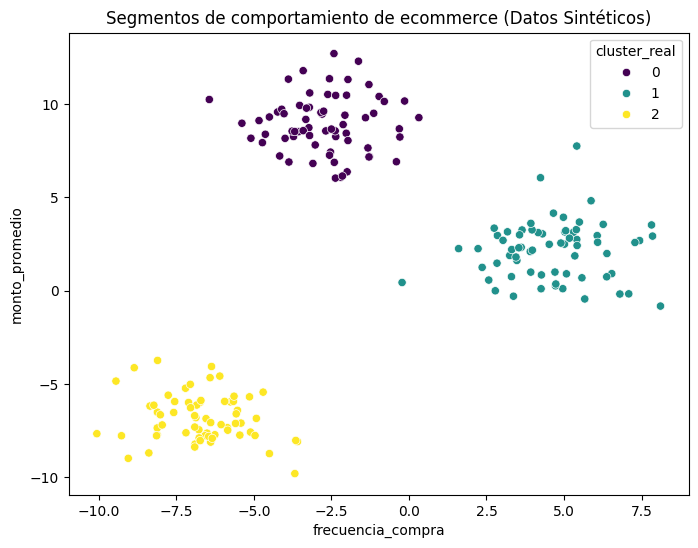

In [3]:
# Paso 2: Crear una base de datos sintética con 3 clústeres

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, cluster_std=1.5, random_state=42)
df = pd.DataFrame(X, columns=["frecuencia_compra", "monto_promedio"])
df['cluster_real'] = y

# Visualizar los datos
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="frecuencia_compra", y="monto_promedio", hue="cluster_real", palette="viridis")
plt.title("Segmentos de comportamiento de ecommerce (Datos Sintéticos)")
plt.show()


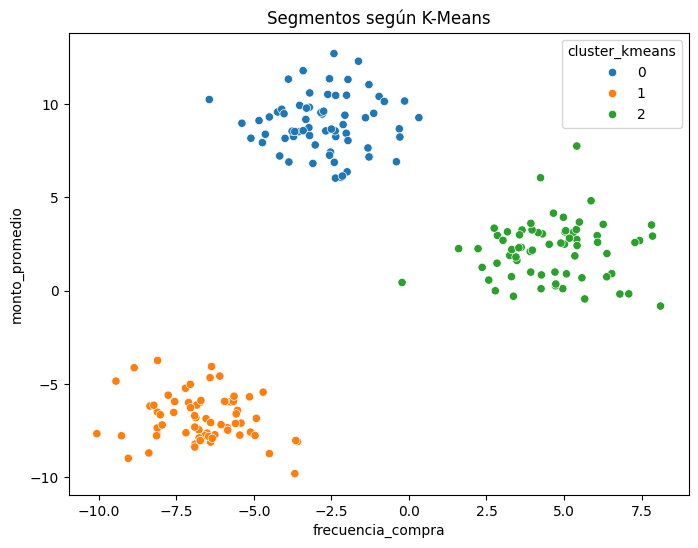

In [4]:
# Paso 3: Estandarizar los datos para clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["frecuencia_compra", "monto_promedio"]])

# Paso 4: Aplicar K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['cluster_kmeans'] = kmeans.labels_

# Visualizar resultados del clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="frecuencia_compra", y="monto_promedio", hue="cluster_kmeans", palette="tab10")
plt.title("Segmentos según K-Means")
plt.show()



In [6]:

# Paso 5: Entrenar un modelo KNN para clasificar nuevos usuarios

X_train, X_test, y_train, y_test = train_test_split(X_scaled, kmeans.labels_, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluar el modelo
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

# Paso 6: Clasificar nuevos usuarios

def clasificar_usuario(frecuencia_compra, monto_promedio):
    datos_nuevo = scaler.transform([[frecuencia_compra, monto_promedio]])
    cluster_predicho = knn.predict(datos_nuevo)[0]
    return cluster_predicho

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [7]:

# Ejemplo
nuevo_usuario = clasificar_usuario(3.5, 300)
print(f"El nuevo usuario pertenece al cluster: {nuevo_usuario}")



El nuevo usuario pertenece al cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
